# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!
Perbedaan utama di antara metode pembelajaran ini adalah metode pelatihan. Dalam bagging, ilmuwan data meningkatkan akurasi pembelajar lemah dengan melatih beberapa pembelajar sekaligus pada beberapa set data. Sebaliknya, boosting melatih pembelajar lemah satu per satu.

# Import Data & Libraries

In [2]:
# import semua libraries yang akan dibutuhkan
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [3]:
# import data dari datasets.load_breast_cancer
data = load_breast_cancer()

# subsetting data
X = data.data
y = data.target

# bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# tampilkan 5 baris pertama
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [6]:
# gunakan RandomForestClassifier dari Sklearn
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# prediksi data test
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.9649122807017544


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class RandomForest:
    def __init__(self, n_trees=10, max_depth=None, min_samples_split=2, n_features=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []
        self.random_state = random_state
        if random_state:
            np.random.seed(random_state)

    def bootstrap_sample(self, X, y):
        """Ambil sampel acak (bootstrap) dari data."""
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        """Latih sekumpulan decision tree dengan subset acak data & fitur."""
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                max_features=self.n_features,
                random_state=self.random_state
            )
            X_samp, y_samp = self.bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        """Prediksi dengan voting mayoritas dari semua pohon."""
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [np.bincount(preds).argmax() for preds in tree_preds]
        return np.array(y_pred)

## Predict Using Random Forest

Accuracy (Random Forest from Scratch): 0.956140350877193


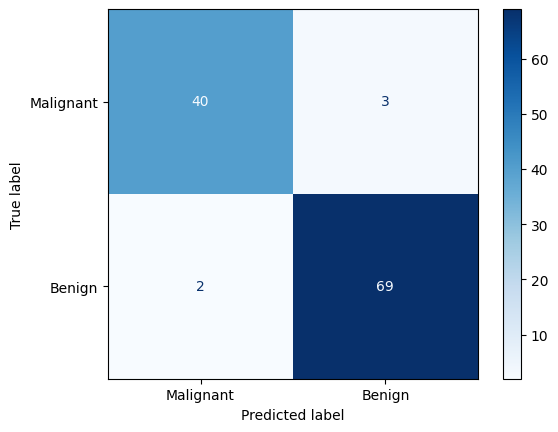

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# fungsi untuk menghitung akurasi manual
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

# buat model RandomForest buatan sendiri
clf = RandomForest(n_trees=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# prediksi data test
y_pred = clf.predict(X_test)

# tampilkan akurasi
print("Accuracy (Random Forest from Scratch):", accuracy(y_test, y_pred))

# tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
disp.plot(cmap='Blues')

# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [11]:
# define and train the model using GradientBoostingClassifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# lakukan prediksi
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy (Gradient Boosting - Sklearn):", accuracy_score(y_test, preds))

Accuracy (Gradient Boosting - Sklearn): 0.956140350877193


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        self.lr = lr                              # learning rate
        self.n_estimators = n_estimators          # jumlah base learner
        self.base_learner = base_learner          # model dasar (DecisionTreeRegressor)
        self.base_models = []                     # menyimpan semua model

    def fit(self, X, y, **params):
        self.base_models = []

        # inisialisasi Fm (prediksi awal log-odds = 0)
        Fm = np.zeros_like(y, dtype=float)

        # buat subplot untuk menampilkan proses training
        # Calculate the number of rows and columns needed
        n_cols = 5
        n_rows = math.ceil(self.n_estimators / n_cols)
        _, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*2))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            # residuals = gradien negatif dari loss logistic
            r_i = y - sigmoid(Fm)

            # latih base learner terhadap residual
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update model (F_{m+1} = F_m + lr * h_m(x))
            Fm += self.lr * h_i.predict(X)

            # Plotting progres setiap iterasi
            ax = axs[i]
            ax.scatter(range(len(y)), sigmoid(Fm), c=y, cmap='coolwarm', s=10)
            ax.set_title(f"Iterasi {i+1}")
            ax.set_ylim(-0.1, 1.1)
            ax.axis('off') # Turn off axis labels for cleaner look


        # Turn off any unused subplots
        for j in range(i + 1, len(axs)):
            axs[j].axis('off')

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        # mulai dari F0 = 0
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)
        return (probs >= 0.5).astype(int)

## Predict Using Gradient Boosting

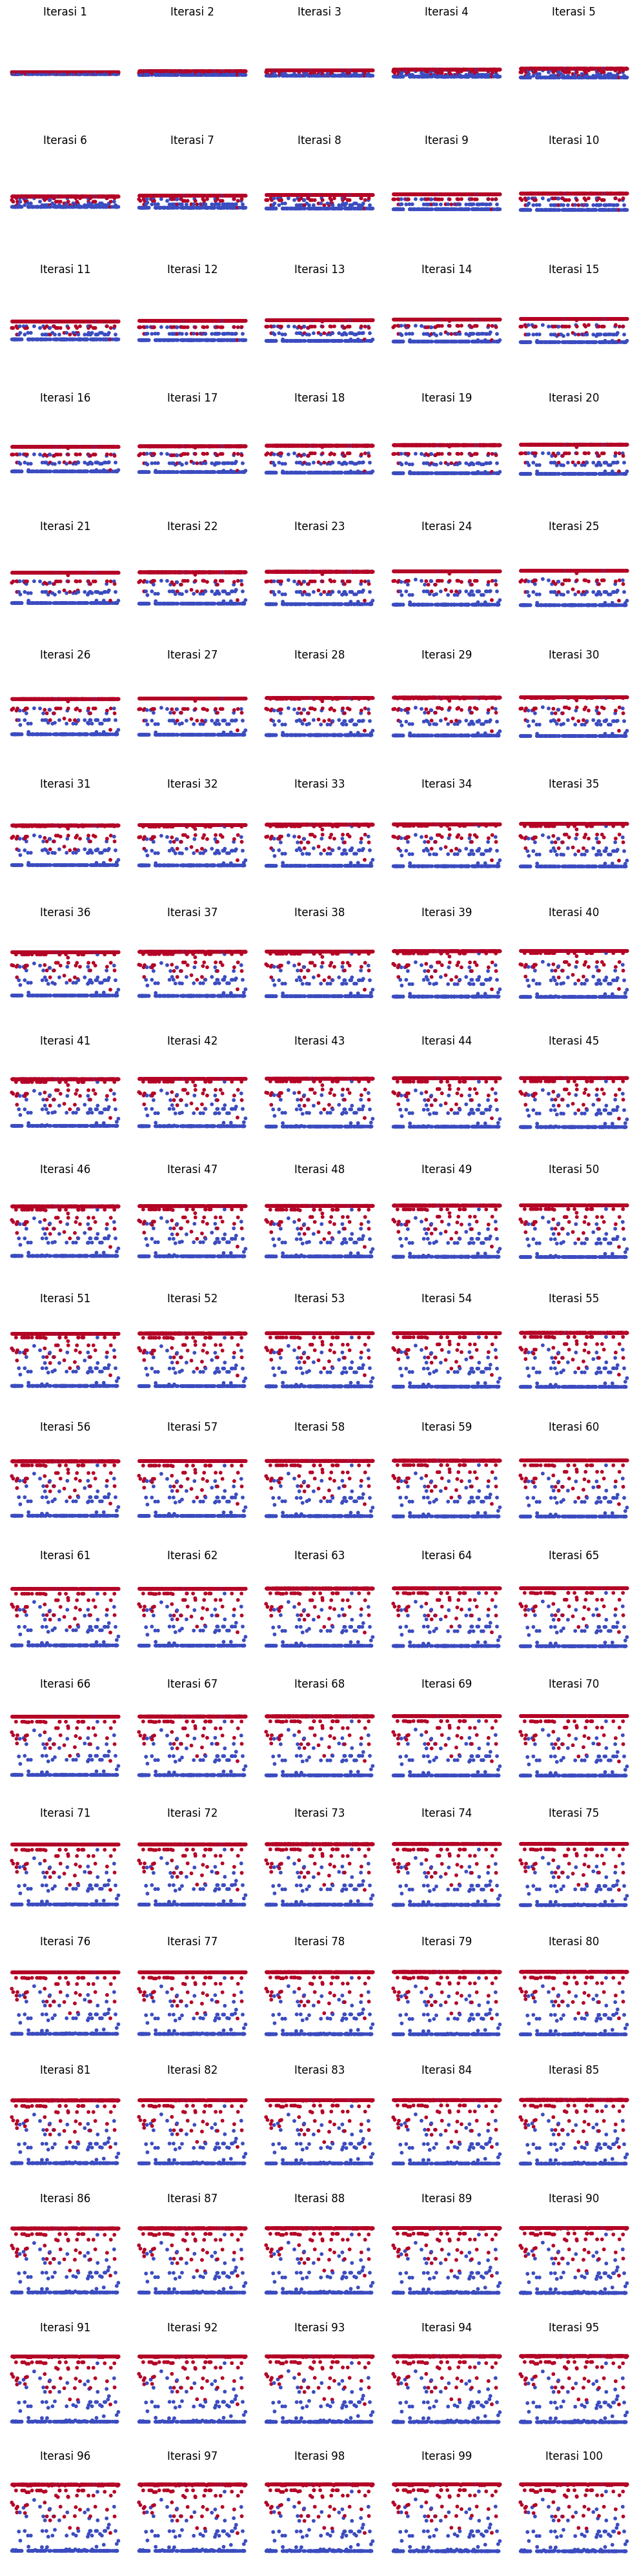

In [15]:
# define and train the model
clf = gradientBoostingClassifier(lr=0.1, n_estimators=100)
clf.fit(X_train, y_train, max_depth=1)

# lakukan prediksi

In [16]:
# get predictions:
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy (Gradient Boosting from Scratch):", accuracy_score(y_test, preds))

Accuracy (Gradient Boosting from Scratch): 0.9473684210526315


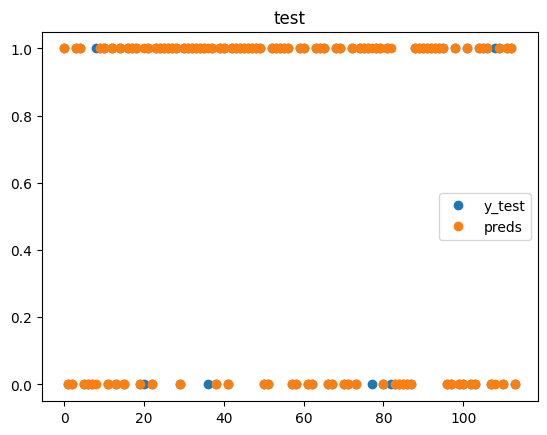

In [17]:
# plot predictions vs. the ground truth:
_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()